<a href="https://colab.research.google.com/github/Nithya1985/Linear-Regression-Model-using-pythonthth/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/content/Salary_Data.csv')
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
len(data)

30

In [ ]:
### Shape of Feature should always be (num.of samples,no.of features) -- 2D Array
### Shape of Target should always be either (no.of samples,) or (no.of samples,no.of targets) -- 1d or 2D

In [ ]:
### Shape of feature - (30,1)
### Shape of target - (30,) or (30,1)

In [ ]:
### Divide the data into features(ip) and target(op)
x = data['YearsExperience'].values
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [ ]:
x = x.reshape(len(data),1)
x.shape

(30, 1)

In [ ]:
y = data['Salary'].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
y.shape

(30,)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=0)


In [ ]:
xtest

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [ ]:
len(xtest)

6

In [ ]:
#build the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
#perform training
model.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#prediction
ypred=model.predict(xtest)
ypred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [ ]:
xtest

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [ ]:
ytest

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [ ]:
### R2 Score - accuracy
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2*100

98.8169515729126

In [ ]:
### R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2*100



98.8169515729126

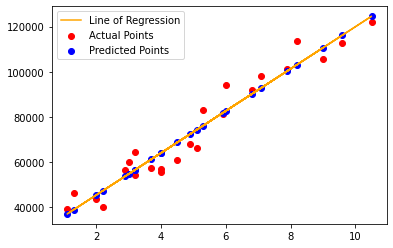

In [ ]:
#### Line of Regression (Training Samples)
plt.scatter(xtrain,ytrain,color="red",label="Actual Points")
plt.scatter(xtrain,model.predict(xtrain),color="blue",label="Predicted Points")
plt.plot(xtrain,model.predict(xtrain),color="orange",label="Line of Regression")
plt.legend()
plt.show()

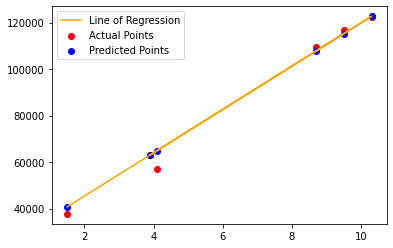

In [ ]:
#### Line of Regression (Test Samples)  #ypred=model.predict(xtest)
plt.scatter(xtest,ytest,color="red",label="Actual Points")
plt.scatter(xtest,model.predict(xtest),color="blue",label="Predicted Points")  #here we can write ypred
plt.plot(xtest,model.predict(xtest),color="orange",label="Line of Regression")
plt.legend()
plt.show()

In [ ]:
# only two red points are out (so they are fore we got 98% accuracy)all the other points are close to actual points

In [ ]:
m = model.coef_   ## slope
c = model.intercept_   ## y intercept

In [ ]:
print(m,c)

[9312.57512673] 26780.09915062818


In [ ]:
## y = 9312.5 * x + 26780   --- Equation of Line

In [ ]:
m * 10.1 + c  ## salary for 10.1  (predicting for any new value of x that is (if we pass any experience the salary can be predicted))

array([120837.10793059])

In [ ]:
model.predict([[10.1]])

array([120837.10793059])

In [ ]:
score=[]
for i in range(501):
  xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,train_size=0.8,random_state=i)
  model1 = LinearRegression()
  model1.fit(xtrain1,ytrain1)
  ypred1 = model.predict(xtest1)
  r2_new = r2_score(ytest1,ypred1)
  score.append(r2_new)

In [ ]:
np.max(score)

0.9960854558678077

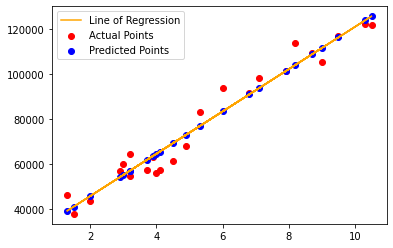

In [ ]:
#### Line of Regression (Training Samples)
plt.scatter(xtrain1,ytrain1,color="red",label="Actual Points")
plt.scatter(xtrain1,model1.predict(xtrain1),color="blue",label="Predicted Points")
plt.plot(xtrain1,model1.predict(xtrain1),color="orange",label="Line of Regression")
plt.legend()
plt.show()

In [ ]:
np.argmax(score)

200

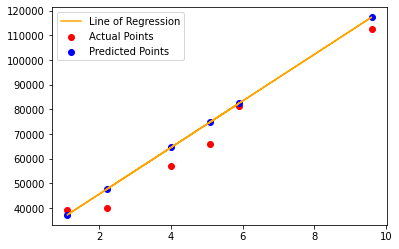

In [ ]:
#### Line of Regression (Test Samples)  #ypred=model.predict(xtest)
plt.scatter(xtest1,ytest1,color="red",label="Actual Points")
plt.scatter(xtest1,model1.predict(xtest1),color="blue",label="Predicted Points")  #here we can write ypred
plt.plot(xtest1,model1.predict(xtest1),color="orange",label="Line of Regression")
plt.legend()
plt.show()

In [ ]:
### Saving the Model In a file
import joblib
joblib.dump(model,"nithya_salary_regression_model.pkl")

['nithya_salary_regression_model.pkl']

In [ ]:
mymodel = joblib.load("/content/nithya_salary_regression_model.pkl")

In [ ]:
mymodel.predict([[22]])

array([231656.75193867])

In [ ]:
def salary_predict():
  years = float(input("Enter Work Experience in Years"))
  salary = mymodel.predict([[years]])
  salary=round(salary[0],2)   #salary[0] denotes only value and removes [], 2 denotes after decimal points two digits i need
  print("The predicted salary is "+str(salary))

In [ ]:
salary_predict()

Enter Work Experience in Years9
The predicted salary is 110593.28
